# Tutorail 1: Defining a baseline and determining UV coverage

In [1]:
import matplotlib.pyplot as plt

from utils.plot_observation import *
from utils.interferometry_objects import *
from utils.source_objects import *

## Baseline definition
 First of all we have to define a baseline by giving the spatial (x, y, z) coordinates of two telescopes, as well as their latitude. The latitude parameter must be passed as instance of the class: angle_deg_min_sec, which gives a degrees object with the form (in this example): $20^\circ~15'~18''$. <br><br> From this, we can call a baseline instance from the SII_observation library (SII_observation.utils.interferometry_objects)

 

In [2]:
coord_t_1 = np.array([100,-250, 0.1])
coord_t_2 = np.array([50, 450, 0.2])

latitude = angle_deg_min_sec(10, 0, 0)
physical_baseline = baseline(coord_t_1, coord_t_2, latitude)

## Source's position definition
Secondly we want to define the source's parameters and the observation duration in hours, which defines the hour angle

In [3]:
declination = angle_deg_min_sec(40,14,1)
duration = [-4, 4]

## Computation of the spatial frequencies u,v,w
Supposing that we can perform interfero-spectrometric measurement, we can call 4 instances (for 4 different wavelengths) of the spatial_frequency class, that allows us to access the u,v,w spatial frequencies, needed to determine the UV-plane coverage

In [4]:
uvw = spatial_frequency(physical_baseline, duration,600,450e-9, declination)
uvw_2 = spatial_frequency(physical_baseline, duration,600,500e-9, declination)
uvw_3 = spatial_frequency(physical_baseline, duration, 600, 550e-9, declination)
uvw_4 = spatial_frequency(physical_baseline, duration, 600, 600e-9, declination)

## Plotting
First, we can plot the uvw instance in the UV-plane (Fourier space), through the plot_uv_plane function. The result is given in units of thousands of lambdas $k\lambda$

<Axes: title={'center': 'Observation UV-plane (real space'}, xlabel='u  [k$\\lambda$]', ylabel='v  [k$\\lambda$]'>

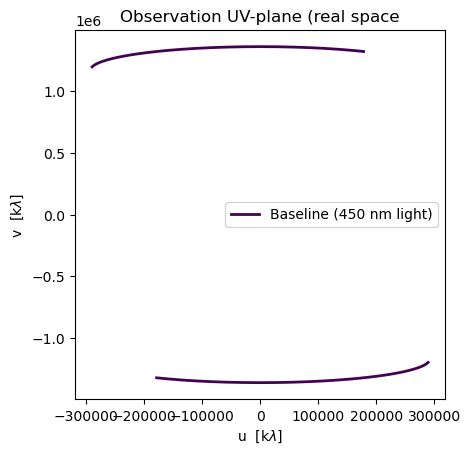

In [5]:
plot_uv_plane(uvw, baseline_name='(450 nm light)')

The same plot can be also expressed with the plot_spatial_uv_plane function, that allows us to visualize the UV plane but in real space. The results are given as projected baselines in meters.

<Axes: title={'center': 'Observation projected baseline'}, xlabel='u  [m]', ylabel='v  [m]'>

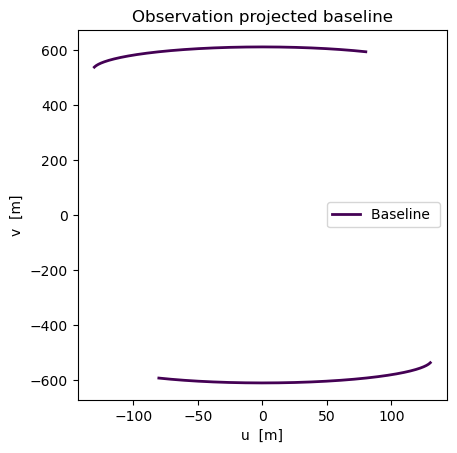

In [6]:
plot_spatial_uv_plane(uvw_2, baseline_name='')

We can plot all the UV-baselines in the Fourier UV-plane for several frequencies (those defined by the instances uvw, uvw_2, uvw_3 and uvw_4). To do so, we exploit the fact that plot_uv_plane function returns the generated ax matplotlib object. By passing this ax in the "ax" argument of the function, you can join different plots in the same axis. 

<Axes: title={'center': 'Observation UV-plane (real space'}, xlabel='u  [k$\\lambda$]', ylabel='v  [k$\\lambda$]'>

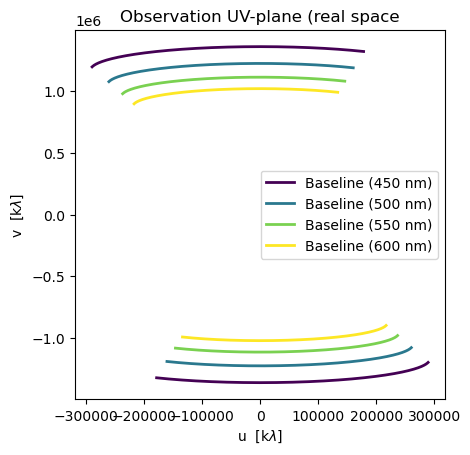

In [7]:
ax=plot_uv_plane(uvw, baseline_name='(450 nm)')
plot_uv_plane(uvw_2, ax=ax, baseline_name='(500 nm)')
plot_uv_plane(uvw_3, ax=ax, baseline_name='(550 nm)')
plot_uv_plane(uvw_4, ax=ax, baseline_name='(600 nm)')

<Axes: title={'center': 'Baseline optical delay'}, xlabel='Observation time [hours]', ylabel='Optical delay [ps]'>

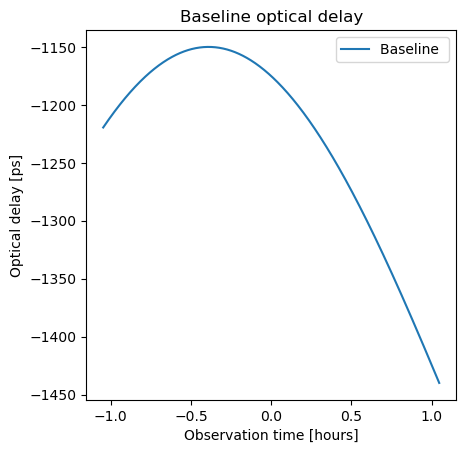

In [8]:
plot_telescopes_delay(uvw)

## Plotting along with source

[-1.78185170e+05 -1.77375781e+05 -1.76564224e+05 -1.75750508e+05
 -1.74934643e+05 -1.74116640e+05 -1.73296508e+05 -1.72474258e+05
 -1.71649899e+05 -1.70823442e+05 -1.69994896e+05 -1.69164272e+05
 -1.68331580e+05 -1.67496829e+05 -1.66660032e+05 -1.65821196e+05
 -1.64980334e+05 -1.64137454e+05 -1.63292568e+05 -1.62445686e+05
 -1.61596817e+05 -1.60745973e+05 -1.59893164e+05 -1.59038400e+05
 -1.58181692e+05 -1.57323050e+05 -1.56462484e+05 -1.55600006e+05
 -1.54735626e+05 -1.53869353e+05 -1.53001200e+05 -1.52131176e+05
 -1.51259293e+05 -1.50385560e+05 -1.49509988e+05 -1.48632589e+05
 -1.47753373e+05 -1.46872350e+05 -1.45989532e+05 -1.45104929e+05
 -1.44218552e+05 -1.43330411e+05 -1.42440519e+05 -1.41548885e+05
 -1.40655521e+05 -1.39760437e+05 -1.38863645e+05 -1.37965154e+05
 -1.37064978e+05 -1.36163125e+05 -1.35259608e+05 -1.34354437e+05
 -1.33447624e+05 -1.32539179e+05 -1.31629114e+05 -1.30717440e+05
 -1.29804167e+05 -1.28889308e+05 -1.27972873e+05 -1.27054873e+05
 -1.26135321e+05 -1.25214

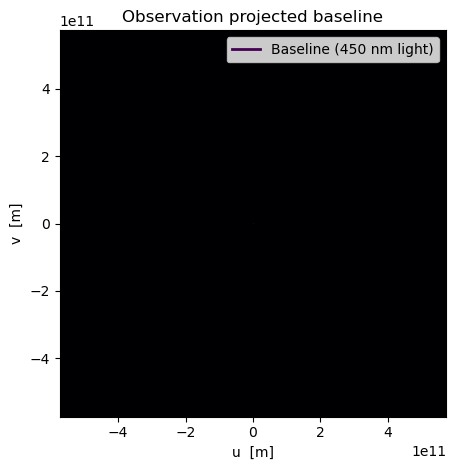

In [9]:
gamma_cas=uniform_disk(0.45,450e-9)
_,_,image, extent_im = gamma_cas.get_image_meters()

"""fig,ax=plt.subplots()

ax.imshow(image, extent=[-extent_im / 2, extent_im / 2, -extent_im / 2, extent_im / 2])
ax.plot(uvw.u_spatial(), uvw.v_spatial(),linewidth=2,zorder=1000, color='r')
ax.plot(-uvw.u_spatial(), -uvw.v_spatial(),linewidth=2,zorder=1000, color='r')

   
plt.tight_layout()
plt.show()
"""

ax=plot_spatial_uv_plane_image(uvw, image, extent_im, baseline_name='(450 nm light)', fix_source=False)
